In [22]:
import numpy as np
import os
import matplotlib.pyplot as plt
import mdtraj as md

In [23]:
#First we read in the trajectory file of the beta amyloid peptide
traj = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

#Define a function to get the end to end distance of our protein
def e2e(traj):
    #Get the indices of the first and last atoms
    first = traj.topology.select('name CA')[0]
    last = traj.topology.select('name CA')[-1]
    #Get the distance between the first and last atoms
    dist = md.compute_distances(traj, [[first, last]])
    return dist

Text(0.5, 1.0, 'End to End Distance of Beta Amyloid Peptide')

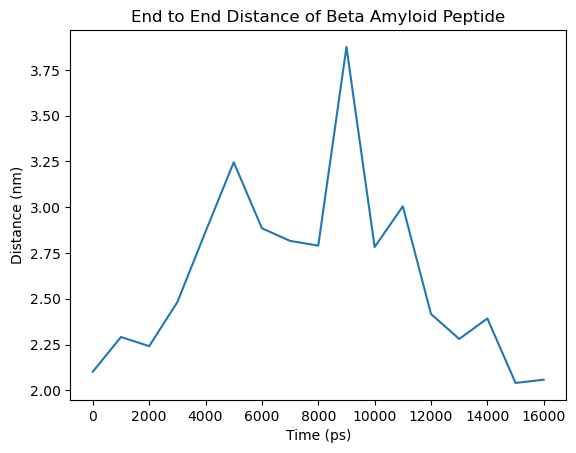

In [24]:
# compute the distance between the first and last atom
dist = e2e(traj)

#plot distance vs time
plt.plot(traj.time, dist)

#Add axis labels and title
plt.xlabel('Time (ps)')
plt.ylabel('Distance (nm)')
plt.title('End to End Distance of Beta Amyloid Peptide')


In [25]:
#Define a function which computes the radius of gyration at each time step
def radius_of_gyration(traj):
    #Get the indices of all the atoms
    indices = traj.topology.select('name CA')
    #Compute the radius of gyration
    rg = md.compute_rg(traj.atom_slice(indices))
    return rg

#Compute the radius of gyration
rg = radius_of_gyration(traj)

Text(0.5, 1.0, 'Radius of gyration of the beta amyloid peptide')

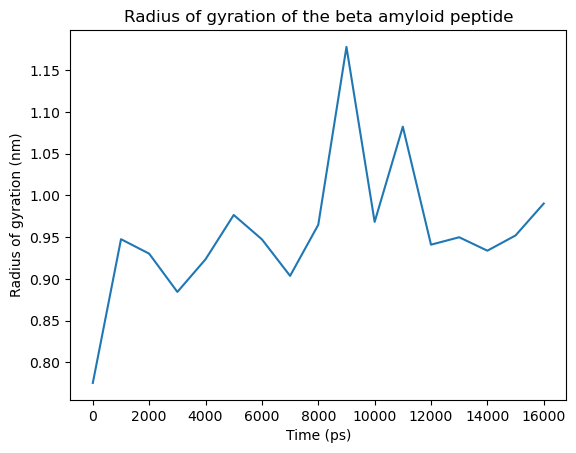

In [7]:
#Plot the radius of gyration vs time
plt.plot(traj.time, rg)
#Add labels to the plot and a title
plt.xlabel('Time (ps)')
plt.ylabel('Radius of gyration (nm)')
plt.title('Radius of gyration of the beta amyloid peptide')

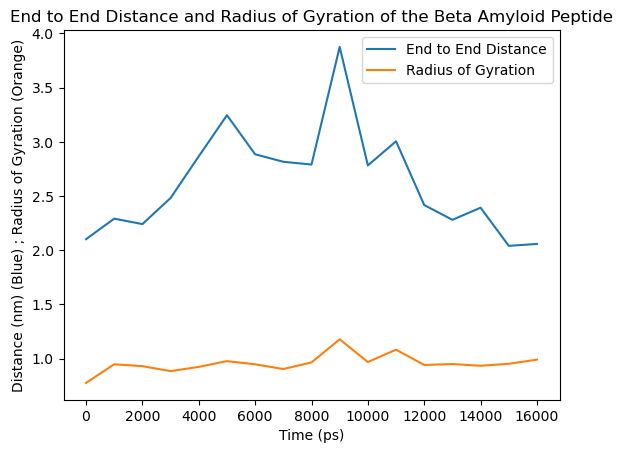

In [26]:
#Plot end to end distance and radius of gyration versus time on the same plot on the same axis
plt.plot(traj.time, dist, label='End to End Distance')
plt.plot(traj.time, rg, label='Radius of Gyration')
#Add labels and a title
plt.xlabel('Time (ps)')
plt.ylabel('Distance (nm) (Blue) ; Radius of Gyration (Orange)')
plt.title('End to End Distance and Radius of Gyration of the Beta Amyloid Peptide')

#Add a legend
plt.legend()